Many helps from perplexity.ai for visualizations

Contents
- BFS
- Dijkstra
- Modified Dijkstra
- Prim

# BFS

In [74]:
from collections import deque

def bfs(graph, start):
    D = {v: float('inf') for v in graph}
    P = {v: None for v in graph}

    D[start] = 0
    queue = deque([start])

    while queue:
        u = queue.popleft()

        for neighbor in graph[u]:
            if D[neighbor] == float('inf'):
                D[neighbor] = D[u] + 1
                P[neighbor] = u
                queue.append(neighbor) # v is now in the frontier

        # u is now behind the frontier
    return D, P

Shortest path from A to F: ['A', 'C', 'F']
Distances: {'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 2}


/var/folders/mt/2lwg_v3j19v3bbpmxqm814cw0000gn/T/ipykernel_9581/953262596.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


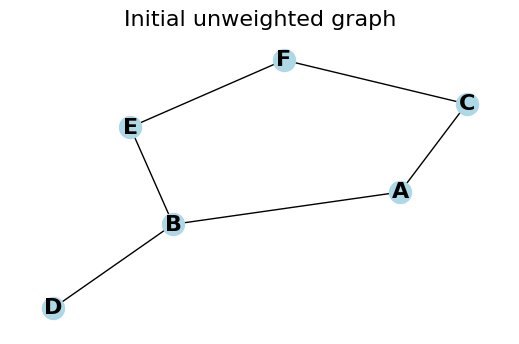

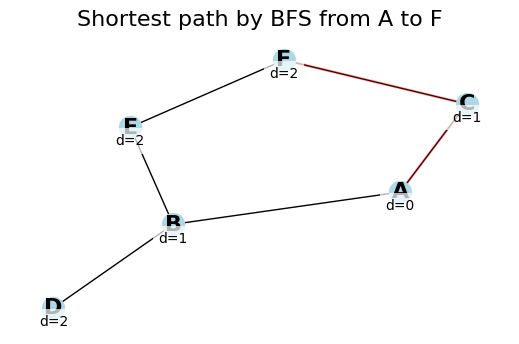

In [75]:
import networkx as nx
import matplotlib.pyplot as plt

# utility function for drawing only
def draw_graph(G, pos, title, path=None, distances=None):
    plt.figure(figsize=(5, 3))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=250, font_size=16, font_weight='bold')

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2, alpha=0.3)

    if distances:
        for node, distance in distances.items():
            x, y = pos[node]
            plt.text(x, y-0.1, f'd={distance}', ha='center', va='center', 
                     bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example graph
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

def get_path(P, start, end):
    path = []
    current = end
    while current != start:
        path.append(current)
        current = P[current]
    path.append(start)
    return path[::-1]

# Perform BFS
start_node = 'A'
D, P = bfs(graph, start_node)
shortest_path = get_path(P, start_node, 'F')

print('Shortest path from A to F:', shortest_path)
print('Distances:', D)
# Create a NetworkX graph
G = nx.Graph(graph)
pos = nx.spring_layout(G)

# Draw the initial graph
draw_graph(G, pos, "Initial unweighted graph")

# Draw the graph with Dijkstra's shortest path
draw_graph(G, pos, f"Shortest path by BFS from {start_node} to F", shortest_path, D)

# Prim algorithm for MST

In [148]:
[key[1] for key in pq]

[inf, inf, inf, inf]

# Dijkstra and Modified Dijkstra

In [106]:
# from queue import PriorityQueue 
import heapq

def dijkstra(graph, start):
    D = {node: float('inf') for node in graph}
    P = {node: None for node in graph}

    D[start], P[start] = 0, start
    pq = []; S = set()

    for v in graph: heapq.heappush(pq, (D[v], v))
    
    while pq:
        __, u = heapq.heappop(pq) # u = Q.extract_min()
        S.add(u)
        print(f"D: {D}, pop {u}")
        
        for v, w_uv in graph[u].items():
            if v in S: continue
            d_suv = D[u] + w_uv
            if d_suv < D[v]:
                D[v] = d_suv
                P[v] = u
                
                # Very inefficient, just for instructional purposes
                for i in range(len(pq)): # Q.decrease_key(v, d_suv)
                    if pq[i][1] == v:
                        pq[i] = (d_suv, v)
                        heapq.heapify(pq)
                        break
                
    return D, P

In [126]:
import heapq

def modified_dijkstra(graph, start):
    D = {node: float('inf') for node in graph}
    P = {node: None for node in graph}

    D[start] = 0
    pq = []
    heapq.heappush(pq, (0, start))

    while pq:
        dist_from_heap, u = heapq.heappop(pq)
        print(f"D: {D}, pop {u}")

        if (dist_from_heap > D[u]):
            print("debug")
            continue

        for v, w_uv in graph[u].items():
            d_suv = D[u] + w_uv
            if d_suv < D[v]:
                D[v] = d_suv
                P[v] = u
                heapq.heappush(pq, (d_suv, v))

    return D, P

def get_path(P, start, end):
    path = []
    current = end
    while current != start:
        path.append(current)
        current = P[current]
    path.append(start)
    return path[::-1]


D: {'A': 0, 'B': inf, 'C': inf, 'D': inf, 'E': inf, 'F': inf}, pop A
D: {'A': 0, 'B': 4, 'C': 2, 'D': inf, 'E': inf, 'F': inf}, pop C
D: {'A': 0, 'B': 3, 'C': 2, 'D': 10, 'E': 12, 'F': inf}, pop B
D: {'A': 0, 'B': 3, 'C': 2, 'D': 8, 'E': 12, 'F': inf}, pop D
D: {'A': 0, 'B': 3, 'C': 2, 'D': 8, 'E': 10, 'F': 14}, pop E
D: {'A': 0, 'B': 3, 'C': 2, 'D': 8, 'E': 10, 'F': 13}, pop F
Shortest path from A to F: A -> C -> B -> D -> E -> F
Total distance: 13


/var/folders/mt/2lwg_v3j19v3bbpmxqm814cw0000gn/T/ipykernel_9581/953262596.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


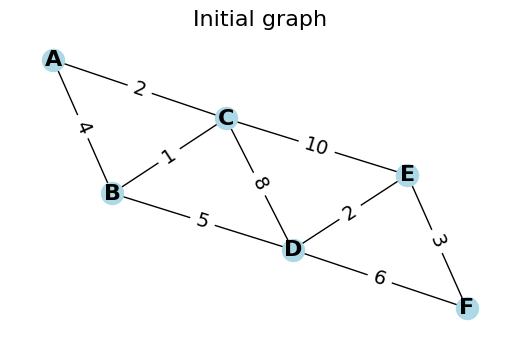

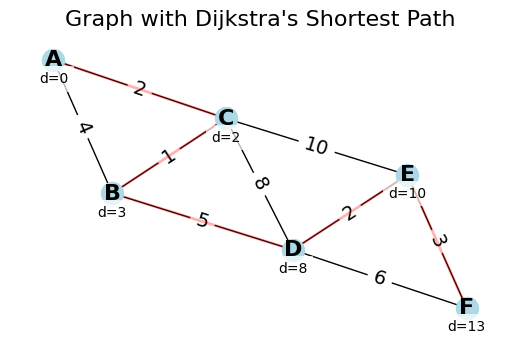

In [127]:
# Example graph
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 1, 'D': 5},
    'C': {'A': 2, 'B': 1, 'D': 8, 'E': 10},
    'D': {'B': 5, 'C': 8, 'E': 2, 'F': 6},
    'E': {'C': 10, 'D': 2, 'F': 3},
    'F': {'D': 6, 'E': 3}
}

start_node = 'A'
end_node = 'F'

# Run Dijkstra's algorithm
D, P = dijkstra(graph, start_node)

# Get the shortest path
shortest_path = get_path(P, start_node, end_node)

print(f"Shortest path from {start_node} to {end_node}: {' -> '.join(shortest_path)}")
print(f"Total distance: {D[end_node]}")

# Create a NetworkX graph
G = nx.Graph(graph)
pos = nx.spring_layout(G)

# for each edge in graph add the weight using nx.set_edge_attributes
for u, neighbors in graph.items():
    for v, weight in neighbors.items():
        G[u][v]['weight'] = weight

# Draw the initial graph
draw_graph(G, pos, "Initial graph")

# Draw the graph with Dijkstra's shortest path
draw_graph(G, pos, "Graph with Dijkstra's Shortest Path", shortest_path, D)

D: {'0': 0, '1': inf, '2': inf, '3': inf, '4': inf}, pop 0
D: {'0': 0, '1': 1, '2': 10, '3': inf, '4': inf}, pop 1
D: {'0': 0, '1': 1, '2': 10, '3': 3, '4': inf}, pop 3
D: {'0': 0, '1': 1, '2': 10, '3': 3, '4': 6}, pop 4
D: {'0': 0, '1': 1, '2': 10, '3': 3, '4': 6}, pop 2
Final D: {'0': 0, '1': 1, '2': 10, '3': 3, '4': 6}
Shortest path from 0 to 4: 0 -> 1 -> 3 -> 4
Total distance: 6


/var/folders/mt/2lwg_v3j19v3bbpmxqm814cw0000gn/T/ipykernel_9581/953262596.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


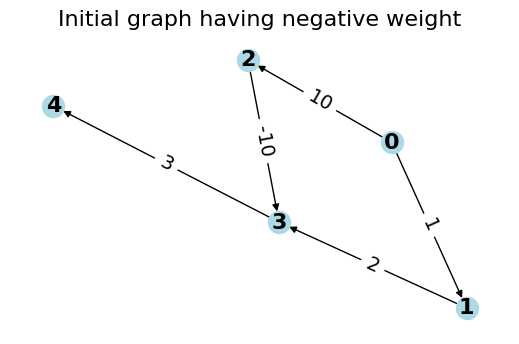

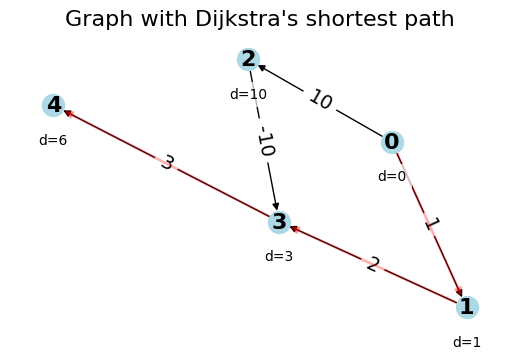

In [135]:
# Example graph

if True:
    # graph from [CP4] Figure 4.19
    A='0'; B='1'; C='2'; D='3'; E='4'
    graph = {
        A: {B: 1, C: 10},
        B: {D: 2},
        C: {D: -10},
        D: {E: 3},
        E: {}
    }
    start_node = A
    end_node = E

else:
    # graph with negative weights
    graph = {
        'S': {'X': 2, 'Y': 1},
        'X': {'Y': -2},
        'Y': {'Z': 1},
        'Z': {},
    }
    start_node = 'S'
    end_node = 'Z'



# Run Dijkstra's algorithm
D, P = dijkstra(graph, start_node)
print("Final D:", D)

# Get the shortest path
shortest_path = get_path(P, start_node, end_node)

print(f"Shortest path from {start_node} to {end_node}: {' -> '.join(shortest_path)}")
print(f"Total distance: {D[end_node]}")

# Create a NetworkX graph
G = nx.DiGraph(graph)
pos = nx.spring_layout(G)

# for each edge in graph add the weight using nx.set_edge_attributes
for u, neighbors in graph.items():
    for v, weight in neighbors.items():
        G[u][v]['weight'] = weight

# Draw the initial graph
draw_graph(G, pos, "Initial graph having negative weight")

# Draw the graph with Dijkstra's shortest path
draw_graph(G, pos, "Graph with Dijkstra's shortest path", shortest_path, D)

D: {'A': 0, 'B': inf, 'C': inf, 'D': inf, 'E': inf, 'F': inf}, pop A
D: {'A': 0, 'B': 1, 'C': 4, 'D': inf, 'E': inf, 'F': inf}, pop B
D: {'A': 0, 'B': 1, 'C': 4, 'D': 4, 'E': 3, 'F': inf}, pop E
D: {'A': 0, 'B': 1, 'C': 4, 'D': 4, 'E': 3, 'F': 4}, pop C
D: {'A': 0, 'B': 1, 'C': 4, 'D': 4, 'E': 3, 'F': 4}, pop D
D: {'A': 0, 'B': 1, 'C': 4, 'D': 4, 'E': 3, 'F': 4}, pop F
Final D: {'A': 0, 'B': 1, 'C': 4, 'D': 4, 'E': 3, 'F': 4}
Shortest path from A to E: A -> B -> E
Total distance: 3


/var/folders/mt/2lwg_v3j19v3bbpmxqm814cw0000gn/T/ipykernel_9581/953262596.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


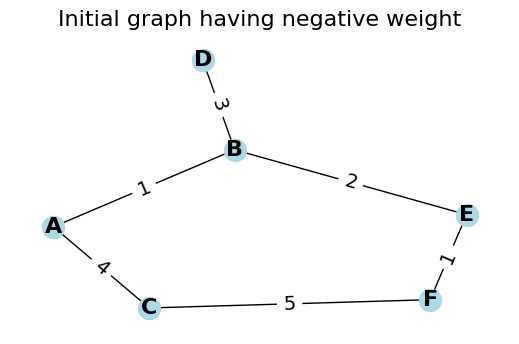

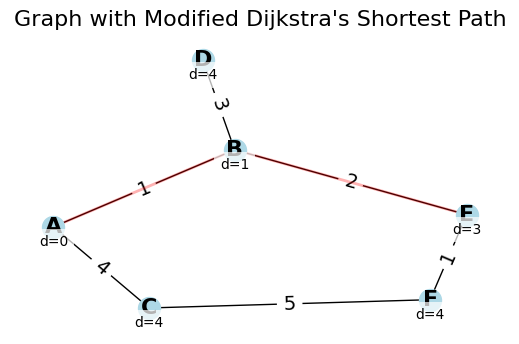

In [167]:
# Run Modified Dijkstra's algorithm
D, P = modified_dijkstra(graph, start_node)
print("Final D:", D)

# Get the shortest path
shortest_path = get_path(P, start_node, end_node)

print(f"Shortest path from {start_node} to {end_node}: {' -> '.join(shortest_path)}")
print(f"Total distance: {D[end_node]}")

# Draw the initial graph
draw_graph(G, pos, "Initial graph having negative weight")

# Draw the graph with Dijkstra's shortest path
draw_graph(G, pos, "Graph with Modified Dijkstra's Shortest Path", shortest_path, D)

# MST Prim 

In [168]:
import heapq

# Similar to dijkstra, implement prim algorithm
def prim(graph, start):
    D = {node: float('inf') for node in graph}
    P = {node: None for node in graph}

    D[start], P[start] = 0, start
    pq = []

    for v in graph: heapq.heappush(pq, (D[v], v))
    
    while pq:
        __, u = heapq.heappop(pq) # u = Q.extract_min()
        # print(f"D: {D}, pop {u}")
        
        for v, w_uv in graph[u].items():
            if v in [key[1] for key in pq] and w_uv < D[v]:
                D[v] = w_uv
                P[v] = u
                
                # Very inefficient, just for instructional purposes
                for i in range(len(pq)): # Q.decrease_key(v, d_suv)
                    if pq[i][1] == v:
                        pq[i] = (w_uv, v)
                        heapq.heapify(pq)
                        break
                
    return D, P

In [169]:
# Example weighted graph
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'D': 3, 'E': 2},
    'C': {'A': 4, 'F': 5},
    'D': {'B': 3},
    'E': {'B': 2, 'F': 1},
    'F': {'C': 5, 'E': 1}
}

# Perform Prim's algorithm
start_node = 'A'
end_node = 'E'
D, P = prim(graph, start_node)

# Get the shortest path
shortest_path = get_path(P, start_node, end_node)

print(f"MST weight = {sum(D.values())}")

# # Create a NetworkX graph
# G = nx.Graph(graph)
# pos = nx.spring_layout(G)

# # for each edge in graph add the weight using nx.set_edge_attributes
# for u, neighbors in graph.items():
#     for v, weight in neighbors.items():
#         G[u][v]['weight'] = weight

# # Draw the initial graph
# draw_graph(G, pos, "Initial graph")

# # Draw the graph with Dijkstra's shortest path
# draw_graph(G, pos, "MST Tree", shortest_path, D)

MST weight = 11


In [ ]:
# import heapq

# # Similar to dijkstra, implement prim algorithm
# def prim(graph, start):
#     D = {node: float('inf') for node in graph}
#     P = {node: None for node in graph}

#     D[start], P[start] = 0, start
#     pq = []
#     visited = [None for _ in len(graph)]

#     for v in graph: heapq.heappush(pq, (D[v], v))
#     nvisited = 0
    
#     while pq and nvisited < len(graph):
#         __, u = heapq.heappop(pq) # u = Q.extract_min()
#         visited[u] = True
#         # print(f"D: {D}, pop {u}")
        
#         for v, w_uv in graph[u].items():
#             if v in [key[1] for key in pq] and w_uv < D[v]:
#                 if visited[v] is None:
#                     D[v] = w_uv
#                     P[v] = u
#                     heapq.heappush(pq, (w_uv, v))
#                     mst_weight += w_uv
#                     nvisited += 1
#                 # D[v] = w_uv
#                 # P[v] = u
                
#                 # # Very inefficient, just for instructional purposes
#                 # for i in range(len(pq)): # Q.decrease_key(v, d_suv)
#                 #     if pq[i][1] == v:
#                 #         pq[i] = (w_uv, v)
#                 #         heapq.heapify(pq)
#                 #         nvisited += 1
#                 #         break
                
#     return D, P